#Project: Employee Attrition Prediction
#Author: Musfira Mubeen
#This project predicts employee attrition using machine learning, helping HR identify employees likely to leave the company.

In [1]:
#install Libraries
!pip install pandas

#Import Libraries

In [2]:
import pandas as pd,joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline






In [3]:
from google.colab import files
files.upload()

Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition.csv


{'WA_Fn-UseC_-HR-Employee-Attrition.csv': b'\xef\xbb\xbfAge,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager\r\n41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5\r\n49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7\r\n37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,

In [4]:
df=pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')


#Exploratory Data Analysis

In [5]:
#First 5 Rows
print("\nFirst Five Rows")
print(df.head())
#Last 5 Rows
print("\nLast Five Rows")
print(df.tail())
#Size of Rows and Columns
print("\nSize of Rows and Columns")
print(df.shape)
#Columns Name
print("\nColumns Name")
print(df.columns)
#Data Type
print("\nData Type")
print(df.dtypes)
#Describe Data
print("\nDescribe Data")
print(df.describe)


First Five Rows
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOpti

In [ ]:
#check Missing Values
print("\nCheck Missing Values")
print(df.isnull().sum())


Check Missing Values
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole

In [ ]:
print(df.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

#Filtering

In [ ]:
df[df['Department']=='Sales']

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
18,53,No,Travel_Rarely,1219,Sales,2,4,Life Sciences,1,23,...,3,80,0,31,3,3,25,8,3,7
21,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,27,...,2,80,0,10,4,3,5,3,0,3
27,42,No,Travel_Rarely,691,Sales,8,4,Marketing,1,35,...,4,80,1,10,2,3,9,7,4,2
29,46,No,Travel_Rarely,705,Sales,2,4,Marketing,1,38,...,4,80,0,22,2,2,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,45,No,Travel_Rarely,374,Sales,20,3,Life Sciences,1,2046,...,3,80,0,8,3,3,5,3,0,1
1461,50,Yes,Travel_Rarely,410,Sales,28,3,Marketing,1,2055,...,2,80,1,20,3,3,3,2,2,0
1462,39,No,Travel_Rarely,722,Sales,24,1,Marketing,1,2056,...,1,80,1,21,2,2,20,9,9,6
1464,26,No,Travel_Rarely,1167,Sales,5,3,Other,1,2060,...,4,80,0,5,2,3,4,2,0,0


In [ ]:
df[df['Age']>40]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
18,53,No,Travel_Rarely,1219,Sales,2,4,Life Sciences,1,23,...,3,80,0,31,3,3,25,8,3,7
25,53,No,Travel_Rarely,1282,Research & Development,5,3,Other,1,32,...,4,80,1,26,3,2,14,13,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,41,No,Travel_Rarely,930,Sales,3,3,Life Sciences,1,2037,...,3,80,1,14,5,3,5,4,0,4
1452,50,Yes,Travel_Frequently,878,Sales,1,4,Life Sciences,1,2044,...,4,80,2,12,3,3,6,3,0,1
1454,45,No,Travel_Rarely,374,Sales,20,3,Life Sciences,1,2046,...,3,80,0,8,3,3,5,3,0,1
1461,50,Yes,Travel_Rarely,410,Sales,28,3,Marketing,1,2055,...,2,80,1,20,3,3,3,2,2,0


In [ ]:
df[(df['Department']=='Sales') &(df['Age'] <30)]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
43,27,No,Travel_Frequently,994,Sales,8,3,Life Sciences,1,56,...,4,80,0,9,0,3,9,8,1,7
54,26,No,Travel_Rarely,1443,Sales,23,3,Marketing,1,72,...,3,80,1,5,2,2,2,2,0,0
86,23,No,Travel_Rarely,541,Sales,2,1,Technical Degree,1,113,...,3,80,1,3,3,3,0,0,0,0
96,24,No,Travel_Rarely,1353,Sales,3,2,Other,1,128,...,1,80,1,4,2,2,3,2,0,2
97,28,No,Non-Travel,120,Sales,4,3,Medical,1,129,...,2,80,0,5,3,4,5,4,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393,27,No,Travel_Rarely,954,Sales,9,3,Marketing,1,1965,...,1,80,0,7,5,3,7,7,0,7
1433,25,No,Travel_Rarely,1382,Sales,8,2,Other,1,2018,...,2,80,1,6,3,2,5,3,0,4
1436,21,No,Travel_Rarely,501,Sales,5,1,Medical,1,2021,...,4,80,0,2,6,3,2,2,1,2
1438,23,Yes,Travel_Frequently,638,Sales,9,3,Marketing,1,2023,...,1,80,1,1,3,2,1,0,1,0


In [ ]:
df[(df['BusinessTravel']=='Travel_Frequently') | (df['Attrition']=='Yes') ]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,50,Yes,Travel_Frequently,878,Sales,1,4,Life Sciences,1,2044,...,4,80,2,12,3,3,6,3,0,1
1456,35,No,Travel_Frequently,1199,Research & Development,18,4,Life Sciences,1,2049,...,4,80,2,10,2,4,10,2,0,2
1461,50,Yes,Travel_Rarely,410,Sales,28,3,Marketing,1,2055,...,2,80,1,20,3,3,3,2,2,0
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3


In [ ]:
df[(df['EducationField']=='Medical') | (df['EducationField']=='Life Sciences')]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
df[(df['DistanceFromHome'] >10) & (df['Department']=='Research & Development')]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7
10,35,No,Travel_Rarely,809,Research & Development,16,3,Medical,1,14,...,3,80,1,6,5,3,5,4,0,3
11,29,No,Travel_Rarely,153,Research & Development,15,2,Life Sciences,1,15,...,4,80,0,10,3,3,9,5,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,41,No,Travel_Rarely,582,Research & Development,28,4,Life Sciences,1,2034,...,3,80,1,21,3,3,20,7,0,10
1456,35,No,Travel_Frequently,1199,Research & Development,18,4,Life Sciences,1,2049,...,4,80,2,10,2,4,10,2,0,2
1459,29,No,Travel_Rarely,1378,Research & Development,13,2,Other,1,2053,...,1,80,1,10,2,3,4,3,0,3
1460,29,No,Travel_Rarely,468,Research & Development,28,4,Medical,1,2054,...,2,80,0,5,3,1,5,4,0,4


In [ ]:
df[df['Department'] != 'Sales'].head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7
10,35,No,Travel_Rarely,809,Research & Development,16,3,Medical,1,14,...,3,80,1,6,5,3,5,4,0,3


In [ ]:
df[(df['StockOptionLevel']==0) & (df['WorkLifeBalance'] <3)]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
29,46,No,Travel_Rarely,705,Sales,2,4,Marketing,1,38,...,4,80,0,22,2,2,2,2,2,1
42,26,Yes,Travel_Rarely,1357,Research & Development,25,3,Life Sciences,1,55,...,3,80,0,1,2,2,1,0,0,1
51,28,Yes,Travel_Rarely,1434,Research & Development,5,4,Technical Degree,1,65,...,3,80,0,2,3,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1412,30,No,Travel_Rarely,911,Research & Development,1,2,Medical,1,1989,...,3,80,0,12,6,2,12,8,1,7
1437,39,No,Non-Travel,105,Research & Development,9,3,Life Sciences,1,2022,...,3,80,0,21,3,2,6,0,1,3
1443,42,No,Travel_Rarely,300,Research & Development,2,3,Life Sciences,1,2031,...,1,80,0,24,2,2,22,6,4,14
1460,29,No,Travel_Rarely,468,Research & Development,28,4,Medical,1,2054,...,2,80,0,5,3,1,5,4,0,4


In [ ]:
df[(df['Attrition']=='Yes') & (df['OverTime']=='Yes') & (df['Age'] <35)]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
14,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,1,19,...,2,80,0,6,4,3,4,2,0,3
26,32,Yes,Travel_Frequently,1125,Research & Development,16,1,Life Sciences,1,33,...,2,80,0,10,5,3,10,2,6,7
34,24,Yes,Travel_Rarely,813,Research & Development,1,3,Medical,1,45,...,1,80,1,6,2,2,2,0,2,0
51,28,Yes,Travel_Rarely,1434,Research & Development,5,4,Technical Degree,1,65,...,3,80,0,2,3,2,2,2,2,2
102,20,Yes,Travel_Frequently,871,Research & Development,6,3,Life Sciences,1,137,...,2,80,0,1,5,3,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353,34,Yes,Non-Travel,967,Research & Development,16,4,Technical Degree,1,1905,...,2,80,1,5,2,3,5,2,3,0
1369,28,Yes,Travel_Rarely,1475,Sales,13,2,Marketing,1,1933,...,4,80,0,6,0,3,2,0,2,2
1375,32,Yes,Travel_Frequently,238,Research & Development,5,2,Life Sciences,1,1939,...,1,80,0,8,2,3,4,1,0,3
1395,31,Yes,Travel_Frequently,754,Sales,26,4,Marketing,1,1967,...,3,80,0,10,4,3,10,7,0,8


In [ ]:
df.sort_values(by='Age',ascending=True).head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
457,18,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,1,614,...,4,80,0,0,3,3,0,0,0,0
828,18,Yes,Non-Travel,247,Research & Development,8,1,Medical,1,1156,...,4,80,0,0,0,3,0,0,0,0
1153,18,Yes,Travel_Frequently,544,Sales,3,2,Medical,1,1624,...,3,80,0,0,2,4,0,0,0,0
1311,18,No,Non-Travel,1431,Research & Development,14,3,Medical,1,1839,...,3,80,0,0,4,1,0,0,0,0
301,18,No,Travel_Rarely,812,Sales,10,3,Medical,1,411,...,1,80,0,0,2,3,0,0,0,0
972,18,No,Non-Travel,1124,Research & Development,1,3,Life Sciences,1,1368,...,3,80,0,0,5,4,0,0,0,0
727,18,No,Non-Travel,287,Research & Development,5,2,Life Sciences,1,1012,...,4,80,0,0,2,3,0,0,0,0
296,18,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,1,405,...,3,80,0,0,2,3,0,0,0,0
127,19,Yes,Travel_Rarely,528,Sales,22,1,Marketing,1,167,...,4,80,0,0,2,2,0,0,0,0
177,19,Yes,Travel_Rarely,303,Research & Development,2,3,Life Sciences,1,243,...,3,80,0,1,3,2,1,0,1,0


In [ ]:
df.sort_values(by='DailyRate',ascending=False)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
427,60,No,Travel_Frequently,1499,Sales,28,3,Marketing,1,573,...,4,80,0,22,5,4,18,13,13,11
986,39,No,Travel_Rarely,1498,Sales,21,4,Life Sciences,1,1390,...,4,80,2,8,2,4,5,4,1,4
1056,28,Yes,Travel_Frequently,1496,Sales,1,3,Technical Degree,1,1486,...,4,80,1,5,3,4,3,2,1,2
155,29,No,Non-Travel,1496,Research & Development,1,1,Technical Degree,1,208,...,1,80,1,10,1,3,10,7,0,9
471,38,No,Travel_Rarely,1495,Research & Development,10,3,Medical,1,634,...,3,80,1,18,4,3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,31,No,Travel_Rarely,106,Human Resources,2,3,Human Resources,1,424,...,4,80,0,9,1,3,2,2,1,0
1437,39,No,Non-Travel,105,Research & Development,9,3,Life Sciences,1,2022,...,3,80,0,21,3,2,6,0,1,3
1110,35,Yes,Travel_Rarely,104,Research & Development,2,3,Life Sciences,1,1569,...,4,80,1,1,2,3,1,0,0,0
14,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,1,19,...,2,80,0,6,4,3,4,2,0,3


In [ ]:
df.sort_values(by=['Department','MonthlyIncome'],ascending=[True,False])

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
956,56,No,Travel_Rarely,206,Human Resources,8,4,Life Sciences,1,1338,...,1,80,0,36,4,3,7,3,7,7
1154,47,No,Travel_Rarely,1176,Human Resources,26,4,Life Sciences,1,1625,...,3,80,1,27,2,3,5,2,1,0
1401,55,No,Travel_Rarely,189,Human Resources,26,4,Human Resources,1,1973,...,1,80,1,35,0,3,10,9,1,4
538,41,No,Travel_Rarely,314,Human Resources,1,3,Human Resources,1,734,...,2,80,1,22,3,3,22,7,2,10
535,41,No,Travel_Rarely,427,Human Resources,10,4,Human Resources,1,731,...,2,80,3,23,2,2,21,6,12,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,18,No,Travel_Rarely,812,Sales,10,3,Medical,1,411,...,1,80,0,0,2,3,0,0,0,0
911,25,Yes,Travel_Frequently,599,Sales,24,1,Life Sciences,1,1273,...,4,80,0,1,4,3,1,0,1,0
1365,29,Yes,Travel_Frequently,746,Sales,24,3,Technical Degree,1,1928,...,4,80,0,1,3,3,1,0,0,0
1338,30,Yes,Travel_Rarely,945,Sales,9,3,Medical,1,1876,...,3,80,0,1,3,2,1,0,0,0


In [ ]:
df.sort_values(by='TotalWorkingYears',ascending=False)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
126,58,Yes,Travel_Rarely,147,Research & Development,23,4,Medical,1,165,...,4,80,1,40,3,2,40,10,15,6
595,58,Yes,Travel_Rarely,286,Research & Development,2,4,Life Sciences,1,825,...,4,80,0,40,2,3,31,15,13,8
98,58,No,Travel_Rarely,682,Sales,10,4,Medical,1,131,...,3,80,0,38,1,2,37,10,1,8
270,55,No,Travel_Rarely,452,Research & Development,1,3,Medical,1,374,...,3,80,0,37,2,3,36,10,4,13
445,55,No,Travel_Rarely,1117,Sales,18,5,Life Sciences,1,597,...,4,80,0,37,2,3,10,9,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1311,18,No,Non-Travel,1431,Research & Development,14,3,Medical,1,1839,...,3,80,0,0,4,1,0,0,0,0
615,27,No,Non-Travel,443,Research & Development,3,3,Medical,1,850,...,3,80,3,0,6,2,0,0,0,0
828,18,Yes,Non-Travel,247,Research & Development,8,1,Medical,1,1156,...,4,80,0,0,0,3,0,0,0,0
727,18,No,Non-Travel,287,Research & Development,5,2,Life Sciences,1,1012,...,4,80,0,0,2,3,0,0,0,0


In [ ]:
df['Attrition'].value_counts()

,count
Attrition,
No,1233
Yes,237


In [ ]:
df.groupby('Department')['MonthlyIncome'].mean()

,MonthlyIncome
Department,
Human Resources,6654.507937
Research & Development,6281.252862
Sales,6959.172646


In [ ]:
df.groupby('EducationField')['Age'].max()

,Age
EducationField,
Human Resources,59
Life Sciences,60
Marketing,60
Medical,60
Other,53
Technical Degree,59


In [ ]:
df.groupby('BusinessTravel')[['DistanceFromHome','DailyRate']].mean()


,DistanceFromHome,DailyRate
BusinessTravel,,
Non-Travel,9.760000,816.960000
Travel_Frequently,9.277978,792.628159
Travel_Rarely,9.088207,803.022052


In [ ]:
df.groupby(['Department','Gender'])['YearsAtCompany'].mean()

Department              Gender
Human Resources         Female    5.300000
                        Male      8.139535
Research & Development  Female    7.300792
                        Male      6.580756
Sales                   Female    7.296296
                        Male      7.276265
Name: YearsAtCompany, dtype: float64

In [ ]:
print(df.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

#Visualization


/tmp/ipython-input-1058357009.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Attrition',data=df,palette=['skyblue','salmon'])


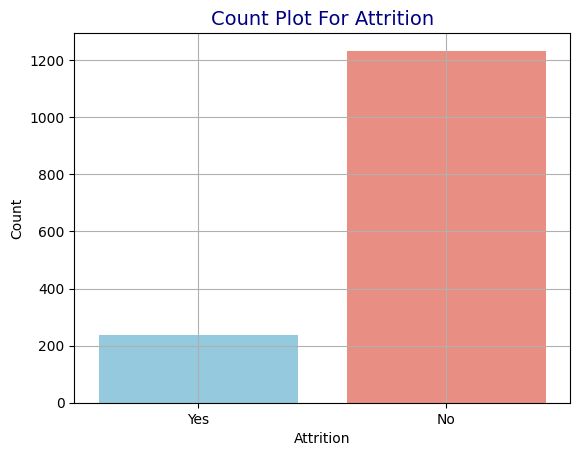

In [ ]:
#CountPlot
# Compare employees who left (Yes) vs stayed (No)
sns.countplot(x='Attrition',data=df,palette=['skyblue','salmon'])
plt.title('Count Plot For Attrition',fontsize=14,color='navy')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.grid(True)
plt.show()


"Employee retention is high - only a small percentage leave the company!"

/tmp/ipython-input-1568122041.py:1: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='Attrition',data=df,hue='Department',palette=['lightgreen','gold'])


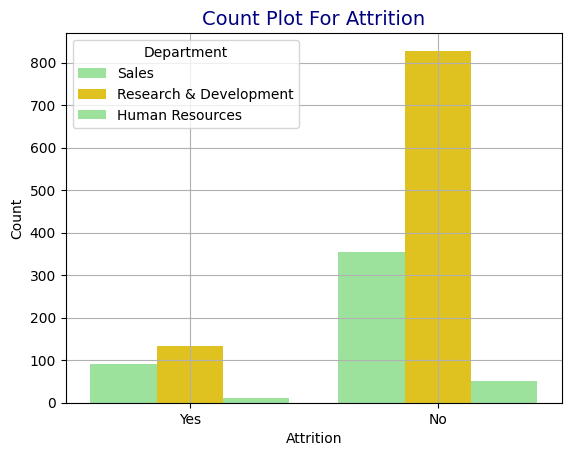

In [ ]:
# Compare employee turnover across different departments
sns.countplot(x='Attrition',data=df,hue='Department',palette=['lightgreen','gold'])
plt.title('Count Plot For Attrition',fontsize=14,color='navy')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.grid(True)
plt.show()

"Research & Development has the most employees, but Sales has the highest turnover percentage!"

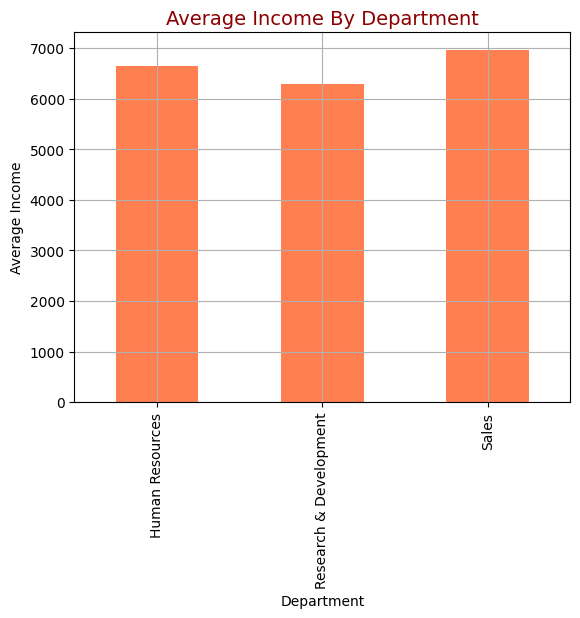

In [ ]:
#COMPARE AVERAGE SALARIES ACROSS DEPARTMENTS:
avg_income=df.groupby('Department')['MonthlyIncome'].mean()
avg_income.plot(kind='bar',color='coral')
plt.title('Average Income By Department',fontsize=14,color='darkred')
plt.xlabel('Department')
plt.ylabel('Average Income')
plt.grid(True)
plt.show()

"The Sales department has the highest average monthly income, while Human Resources and other departments earn comparatively less, highlighting salary differences across departments."

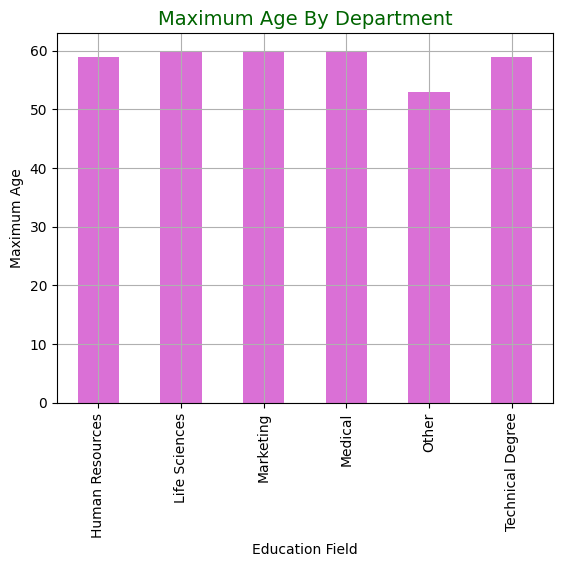

In [7]:
#maximum age of employees across different education fields
avg_age=df.groupby('EducationField')['Age'].max()
avg_age.plot(kind='bar',color='orchid')
plt.title('Maximum Age By Department',fontsize=14,color='darkgreen')
plt.xlabel('Education Field')
plt.ylabel('Maximum Age')
plt.grid(True)
plt.show()

"Employees with Technical Degree and Medical backgrounds are the oldest, while Marketing and Life Sciences fields have younger maximum ages."

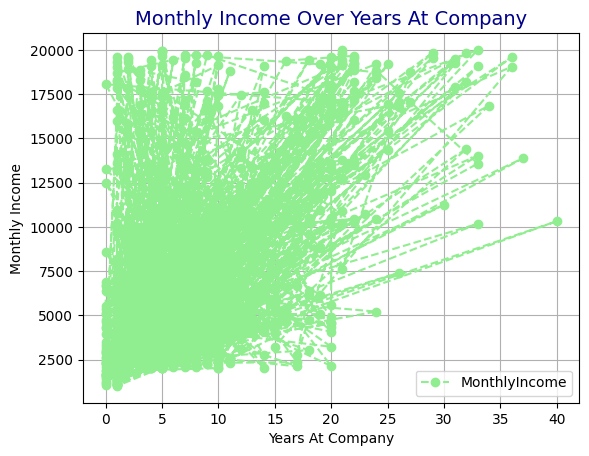

In [ ]:
#Line plot showing the relationship between employees’ tenure and their monthly income
df.plot(x='YearsAtCompany',y='MonthlyIncome',kind='line'
         ,color='lightgreen',marker='o',linestyle='--')
plt.title('Monthly Income Over Years At Company',fontsize=14,color='darkblue')
plt.xlabel('Years At Company')
plt.ylabel('Monthly Income')
plt.grid(True)
plt.show()


"Monthly income tends to increase as employees spend more years at the company, indicating experience-based salary growth."

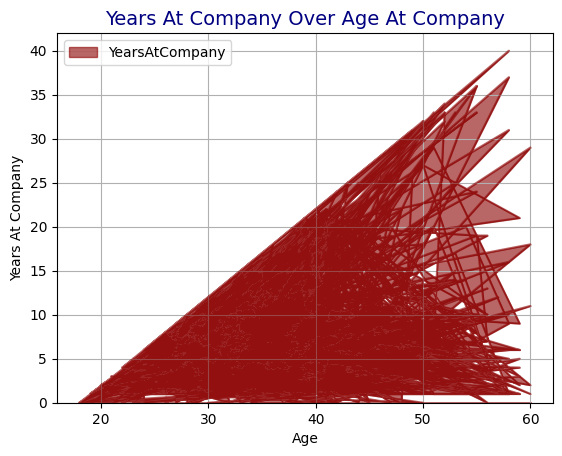

In [ ]:
#area plot
df.plot(x='Age',y='YearsAtCompany',
         kind='area',color='darkred',alpha=0.6)
plt.title('Years At Company Over Age At Company',fontsize=14,color='navy')
plt.xlabel('Age')
plt.ylabel('Years At Company')
plt.grid(True)
plt.show()

"Older employees generally have spent more years at the company, showing a positive correlation between age and tenure."

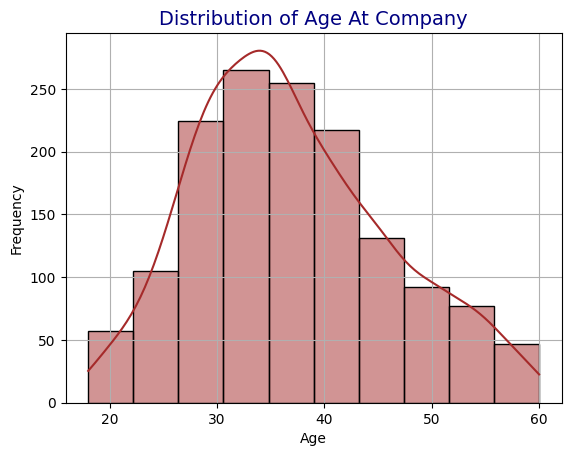

In [ ]:
#HistoGram Plot
sns.histplot(x='Age',data=df,color='brown',bins=10,kde=True)
plt.title('Distribution of Age At Company',fontsize=14,color='navy')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

"Most employees are concentrated in the 25–35 age range, indicating a relatively young workforce."

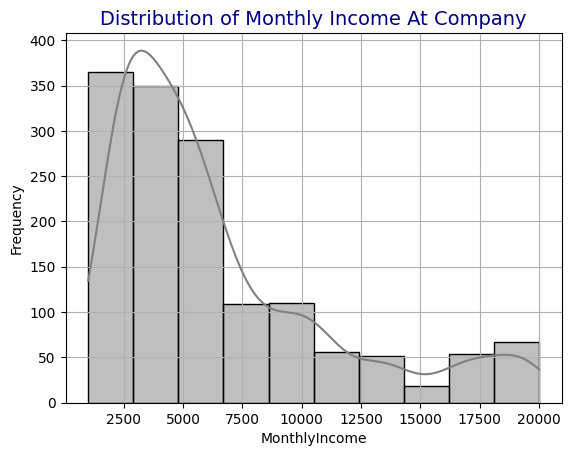

In [ ]:
#HistoGram Plot
sns.histplot(x='MonthlyIncome',data=df,color='gray',bins=10,kde=True)
plt.title('Distribution of Monthly Income At Company',fontsize=14,color='navy')
plt.xlabel('MonthlyIncome')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

"Majority of employees earn a lower to mid-range salary, with fewer employees in the high-income bracket."

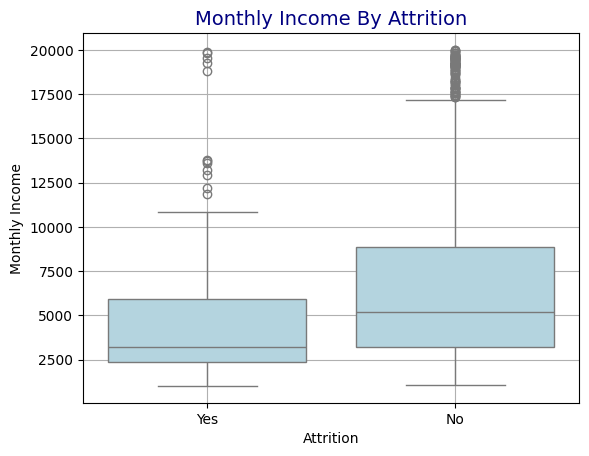

In [ ]:
#BoxPlot
sns.boxplot(x='Attrition',y='MonthlyIncome',data=df,color='lightblue')
plt.title('Monthly Income By Attrition',fontsize=14,color='navy')
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')
plt.grid(True)
plt.show()

"Employees who left the company generally have lower median monthly income compared to those who stayed."

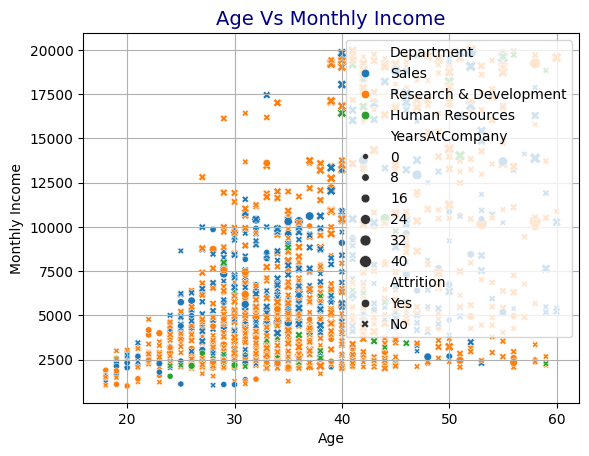

In [ ]:
#Scatter Plot
sns.scatterplot(x='Age',y='MonthlyIncome',data=df,hue='Department',style='Attrition',size='YearsAtCompany')
plt.title('Age Vs Monthly Income',fontsize=14,color='navy')
plt.xlabel('Age')
plt.ylabel('Monthly Income')
plt.grid(True)
plt.show()

"Income generally increases with age and experience, and employees in certain departments earn more; most employees who left are clustered in lower income ranges."

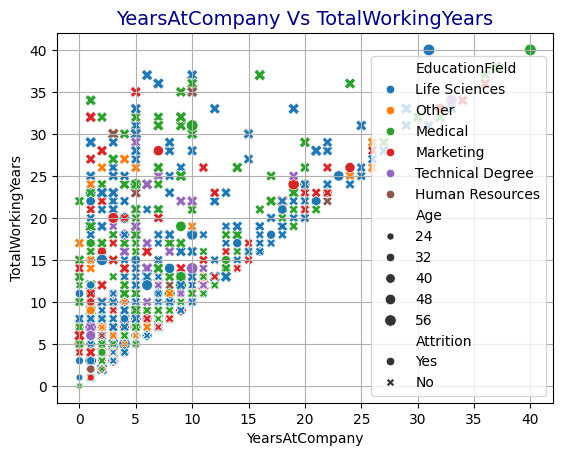

In [ ]:
#Scatter Plot
sns.scatterplot(x='YearsAtCompany',y='TotalWorkingYears',data=df,hue='EducationField',style='Attrition',size='Age')
plt.title('YearsAtCompany Vs TotalWorkingYears',fontsize=14,color='navy')
plt.xlabel('YearsAtCompany')
plt.ylabel('TotalWorkingYears')
plt.grid(True)
plt.show()

"Employees with more total working experience tend to stay longer at the company, and attrition is higher among those with fewer years at the company."

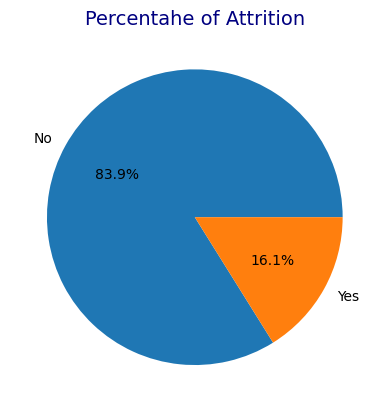

In [ ]:
#Pie Plot
attrition=df['Attrition'].value_counts()
plt.pie(attrition,labels=attrition.index,autopct='%.1f%%')
plt.title('Percentahe of Attrition',fontsize=14,color='navy')
plt.show()

"The majority of employees stayed at the company, while a smaller portion left, indicating relatively low attrition overall."

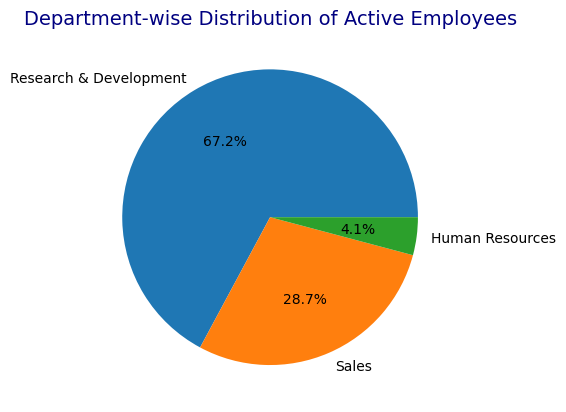

In [ ]:
#Pie Chart
no=df[df['Attrition']=='No']
department=no['Department'].value_counts()
plt.pie(department,labels=department.index,autopct='%.1f%%')
plt.title('Department-wise Distribution of Active Employees',fontsize=14,color='navy')
plt.show()

"Most active employees belong to the Research & Development department, followed by Sales, indicating where the workforce is concentrated."

#Feature Engineering

In [8]:
#Drop Columns
df.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1,inplace=True)

In [9]:
#Label Encoding
for cols in['Attrition','Gender']:
 if cols=='Attrition':
  df[cols]=df[cols].map({'Yes':1,'No':0})
 elif cols=='Gender':
    df[cols]=df[cols].map({'Male':1,'Female':0})






In [10]:
#Label Encoding
df['OverTime']=df['OverTime'].map({'Yes':1,'No':0})

In [11]:
#one hot encoding
df=pd.get_dummies(df,columns=['BusinessTravel'],drop_first=True,dtype=int)

In [12]:
df=pd.get_dummies(df,columns=['Department'],drop_first=True,dtype=int)

In [13]:
df=pd.get_dummies(df,columns=['EducationField'],drop_first=True,dtype=int)

In [14]:
df=pd.get_dummies(df,columns=['MaritalStatus'],drop_first=True,dtype=int)

In [15]:
df=pd.get_dummies(df,columns=['JobRole'],drop_first=True,dtype=int)

In [16]:
df['SatisfactionLevel']=df['EnvironmentSatisfaction']+ df['JobSatisfaction']+ df['JobInvolvement']+ df['RelationshipSatisfaction']

In [17]:
df.drop(['EnvironmentSatisfaction', 'JobSatisfaction', 'JobInvolvement', 'RelationshipSatisfaction'], axis=1, inplace=True)


In [18]:
df['YearsAtCompanyRatio']=df['YearsAtCompany']/df['Age']

In [19]:
df['PromotionYearsRatio']=df['YearsSinceLastPromotion']/df['YearsAtCompany']

In [20]:
df['LongCommute'] = (df['DistanceFromHome'] > 10).astype(int)


In [21]:
df['IsSenior'] = (df['Age'] > 40).astype(int)


In [22]:
print(df['PromotionYearsRatio'].describe())


count    1426.000000
mean        0.299187
std         0.341839
min         0.000000
25%         0.000000
50%         0.174242
75%         0.500000
max         1.000000
Name: PromotionYearsRatio, dtype: float64


In [23]:
df['PromotionYearsRatio'].fillna(df['PromotionYearsRatio'].median(),inplace=True)

/tmp/ipython-input-4190571079.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PromotionYearsRatio'].fillna(df['PromotionYearsRatio'].median(),inplace=True)


In [24]:
print(df.isnull().sum())

Age                                  0
Attrition                            0
DailyRate                            0
DistanceFromHome                     0
Education                            0
Gender                               0
HourlyRate                           0
JobLevel                             0
MonthlyIncome                        0
MonthlyRate                          0
NumCompaniesWorked                   0
OverTime                             0
PercentSalaryHike                    0
PerformanceRating                    0
StockOptionLevel                     0
TotalWorkingYears                    0
TrainingTimesLastYear                0
WorkLifeBalance                      0
YearsAtCompany                       0
YearsInCurrentRole                   0
YearsSinceLastPromotion              0
YearsWithCurrManager                 0
BusinessTravel_Travel_Frequently     0
BusinessTravel_Travel_Rarely         0
Department_Research & Development    0
Department_Sales         

#Machine Learning

In [25]:
#Split features and target
x=df.drop(['Attrition'],axis=1)
y=df['Attrition']

In [26]:
# Split dataset into training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#PipeLine

In [27]:
#preprocessing
standard=['Age','HourlyRate']
minmax=['DailyRate','MonthlyIncome','MonthlyRate']
preprocessor=ColumnTransformer(transformers=[
    ('std',StandardScaler(),standard),
    ('min_max',MinMaxScaler(),minmax),
],
    remainder='passthrough')

In [28]:
#Build pipeline with SMOTE + Gradient Boosting
pipeline=ImbPipeline(steps=[
    ('preprocessor',preprocessor),
    ('smote',SMOTE(random_state=42)),
    ('gb',GradientBoostingClassifier(
        random_state=42
    ))
])
#Hyperparameter tuning with GridSearchCV
param_grid={
    'gb__n_estimators':[100,200,300],
    'gb__learning_rate':[0.01,0.05,0.1],
    'gb__max_depth':[3,5,7]
}
grid=GridSearchCV(
    pipeline,
    param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1
)
grid.fit(x_train,y_train)
print(f"Best Parameters: {grid.best_params_}")
print(f"Best Score: {grid.best_score_}")
best_model=grid.best_estimator_
y_pred=best_model.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test,y_pred)}")
print(f"Confusion Matrix: {confusion_matrix(y_test,y_pred)}")
print(f"Classification Report: {classification_report(y_test,y_pred)}")



Best Parameters: {'gb__learning_rate': 0.05, 'gb__max_depth': 3, 'gb__n_estimators': 200}
Best Score: 0.5236281645957405
Accuracy Score: 0.891156462585034
Confusion Matrix: [[247   8]
 [ 24  15]]
Classification Report:               precision    recall  f1-score   support

           0       0.91      0.97      0.94       255
           1       0.65      0.38      0.48        39

    accuracy                           0.89       294
   macro avg       0.78      0.68      0.71       294
weighted avg       0.88      0.89      0.88       294



#Cross Validation

In [29]:
score=cross_val_score(best_model,x_train,y_train,
                      cv=5,
                      scoring='f1')
print(f"Cross Validation Scores: {score}")
print(f"Mean Score: {score.mean()}")
print(f"Standard Deviation: {score.std()}")

Cross Validation Scores: [0.42857143 0.66666667 0.44827586 0.53731343 0.53731343]
Mean Score: 0.5236281645957405
Standard Deviation: 0.08431884577955583


#Feature Importance

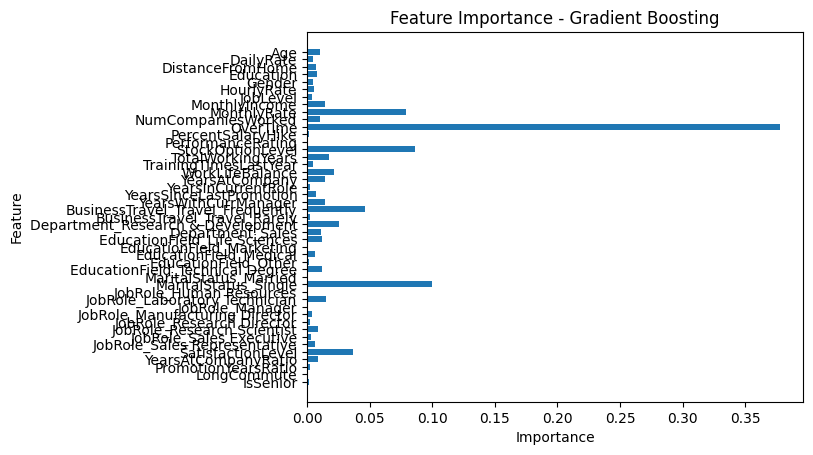

In [30]:

# Get feature importances from Gradient Boosting
importances = best_model.named_steps['gb'].feature_importances_
features = x_train.columns

# Plot
plt.barh(features, importances)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance - Gradient Boosting")
plt.gca().invert_yaxis()
plt.show()

In [31]:
#save model
joblib.dump(best_model,'employee_attrition.pk1')
print("Model saved as 'employee_attrition_gb.pkl'")


Model saved as 'employee_attrition_gb.pkl'


In [32]:
#load
loaded=joblib.load('employee_attrition.pk1')
prediction=loaded.predict(x_test[:5])
print(f"Prediction: {prediction}")

Prediction: [0 0 0 0 0]


Conclusion:
The optimized Gradient Boosting model predicts employee attrition with 89% accuracy, performing very well in identifying employees who stay. Although predicting employees who leave is more challenging due to class imbalance, the model provides valuable insights for HR to improve retention and workforce planning.